In [1]:
import os 
import pandas as pd
from os import listdir
from os.path import isfile, join
import json

_path ="D:\\Master\\S2\\TER\\TEST_ROBIN\\ter-genetic-algorithm-leek-wars\\genetics\\data\\genetic"

nbGen = 300 

In [2]:
import re
def filename_isvalid(filename):
    f_str = os.path.splitext(filename)
    if(f_str[1] =='.json') :
        res = re.fullmatch("^(\d+)\-\d+$",f_str[0] )
        return bool(res) and int(res.group(1)) < nbGen
    return False 
        

In [3]:
col_df =  ["generation","score","victories","draws","defeats","duration","useGene","nb"] 
df_row = {"score":[] , "victories" :[] ,"draws":[],"defeats":[],"duration":[],"useGene":[],"nb" :0  }


In [4]:
import copy



def create_df (nbRow = nbGen) :
        df = pd.DataFrame( columns = col_df ) 
        #df.set_index(col_df[0]) 
        for i in range(1,nbRow+1) :
                _dct = copy.deepcopy(df_row)
                _dct.update({col_df[0] : i})
                df.loc[len(df)]=_dct
        return df 
    
def write_df ( _path , name="data.csv" ,nbRow = nbGen ):
        df =create_df (nbRow ) 
        path_f_csv= os.path.join(_path , name )
        df.to_csv(path_f_csv ,sep=";",encoding="utf-8")
        return (df , path_f_csv )  

In [5]:
_df , path_df = write_df(_path )

In [6]:
def merge_row (_df , numGen , row ):
    idx = int(numGen -1)
    atm_row = _df.iloc[idx].to_dict()
    new_row = copy.deepcopy(df_row)
    for k in new_row.keys():
        if(k != col_df[0]):
            if(k != "nb" and not(isinstance( row[k], list))):
                row[k] = [row[k]]
            new_row[k]+= (atm_row[k] +  row[k])
    new_row.update({col_df[0] :numGen})
    _df.iloc[idx] = new_row 
    
def merge_dfs (_df , df_2):
    sub_df_2 = df_2.query("nb > 0 ")
    for i , row in sub_df_2.iterrows():
        merge_row (_df,row[col_df[0]] ,row)
    return sub_df_2

In [ ]:
files = list(filter(lambda k: filename_isvalid(k) , [f for f in listdir(_path) if isfile(join(_path, f))]))
for i, file in enumerate(files) :
        path_file = os.path.join(_path,file)
        with open(path_file, 'r') as f:
            gen_dict = json.load(f)
            print(path_file)
        for individu in gen_dict :
            _dct = dict()
            for prop_name in col_df:
                if(prop_name =="nb"):
                    _dct.update({prop_name : 1 })
                elif (prop_name == "useGene"):
                     _dct.update({prop_name :sum(individu[prop_name]) })
                else:
                    _dct.update({prop_name :individu[prop_name] })
            merge_row ( _df ,individu[col_df[0]],_dct)


                

In [8]:
for i in range(nbGen):
    lst =  [len(_df.iloc[i][col]) for col in col_df if isinstance(_df.iloc[0][col] , list)]
    for e in lst :
            if (e != _df.iloc[i]["nb"]):
                print(lst,i,_df.iloc[i]["nb"])

In [10]:
import numpy as np 

def write_df_rd (df_ , _path, name): 
    path_f_csv= os.path.join(_path , name )
    df_.to_csv(path_f_csv ,sep=";",encoding="utf-8")

In [11]:
write_df_rd (_df ,_path , "data.csv") 

In [12]:
nouveau_df = _df.drop(["generation","nb"], axis=1)

In [19]:
tt_df = pd.DataFrame()
for col in nouveau_df.columns:
    print(col)
    e_lst =list(filter(lambda k: len(k)> 0 , nouveau_df[col].values))
    if(col.startswith("victories") or col.startswith("defeats") or col.startswith("draws") ):
        z_lst = [{col+"_"+"mean":round(np.mean(np.array(e))/10,2) , col+"_"+"var" : round(np.var(np.array(e))/100,2) ,col+"_"+"std" : round(np.std(np.array(e))/10,2)} for e in e_lst ]
    else:
        z_lst = [{col+"_"+"mean":round(np.mean(np.array(e)),2) , col+"_"+"var" : round(np.var(np.array(e)),2) ,col+"_"+"std" : round(np.std(np.array(e)),2)} for e in e_lst ]
    
    u_df = pd.DataFrame.from_records(z_lst)
    write_df_rd (u_df,_path,col+".csv")
    tt_df = pd.concat([tt_df,u_df ], axis=1)


score
victories
draws
defeats
duration
useGene


In [52]:
def read_df_rd ( _path, name , index_col=0 ): 
    path_f_csv= os.path.join(_path , name )
    return pd.read_csv(path_f_csv,sep=";",encoding="utf-8",index_col=index_col)

In [53]:
df_defa = []
for col in ["defeats","victories","draws"]:
    df_defa.append(read_df_rd(_path,col+".csv",0))

In [54]:
df_victory = pd.concat(df_defa , axis=1) 

In [41]:
 write_df_rd (df_victory ,_path , "victory.csv")

In [44]:
list(filter(lambda k : k.endswith('mean') ,list(df_victory.columns)))

['defeats_mean', 'victories_mean', 'draws_mean']

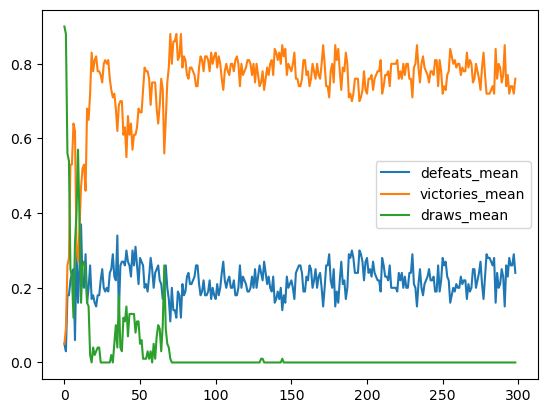

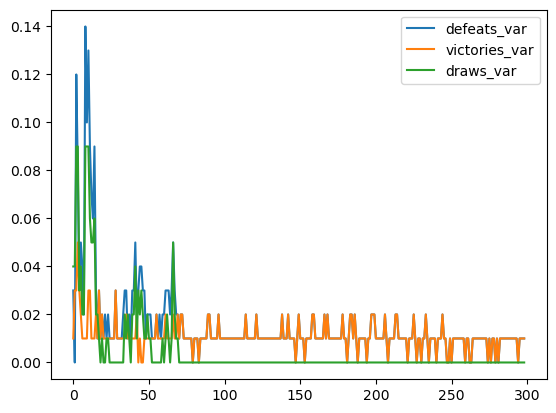

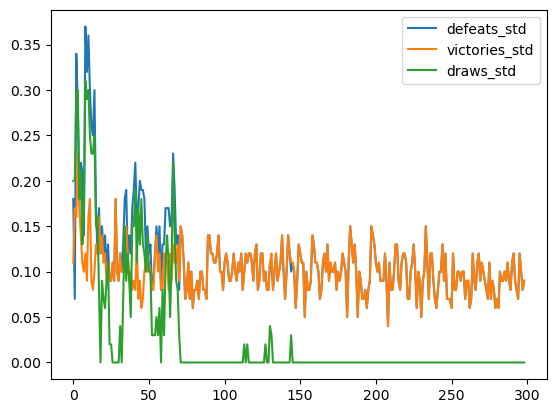

In [70]:
for _p in ["mean","var","std"]:
    df_victory[list(filter(lambda k : k.endswith(_p) ,list(df_victory.columns)))].plot()
    fig = plt.gcf()
    img = fig2img(fig)
    l_path = os.path.join(e_path,"victory") 
    if not os.path.exists(l_path):
        os.makedirs(l_path)
    img.save(  os.path.join(l_path,_p+'.png'))

In [65]:
col_df_2 = set(col_df) - set(["defeats","victories","draws"]) -set(["generation","nb"])

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img
  
    

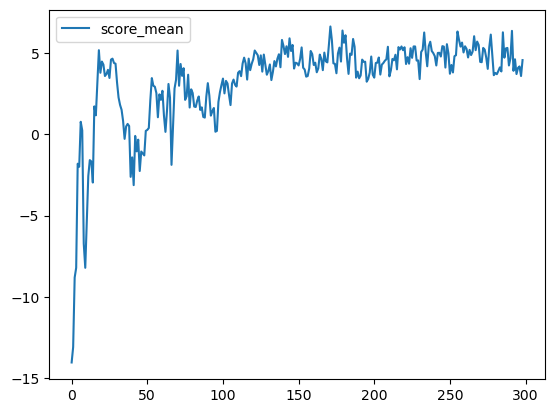

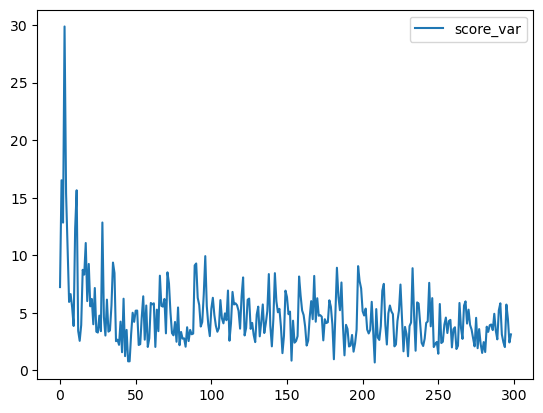

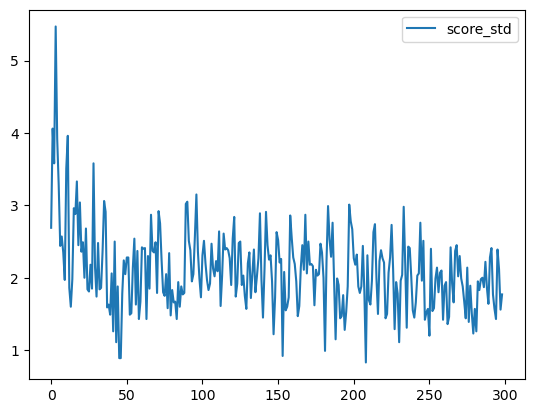

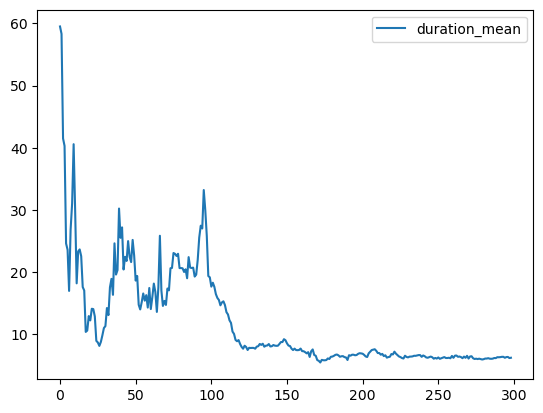

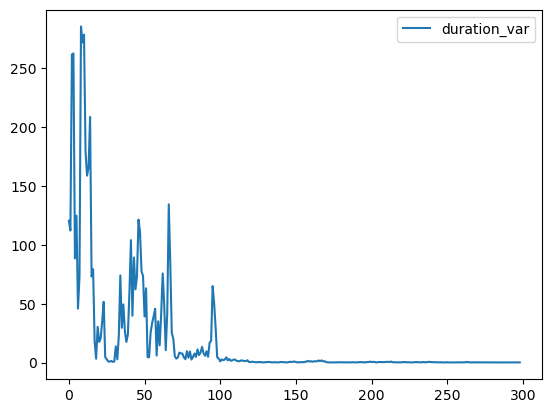

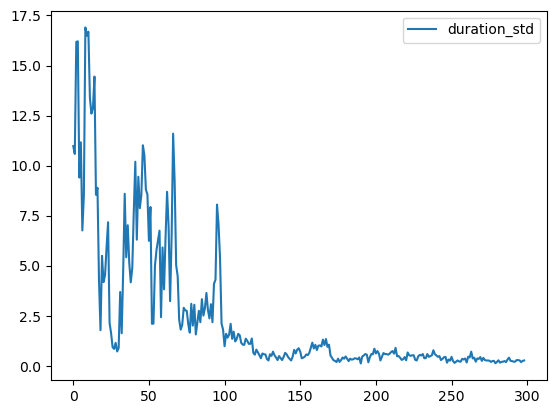

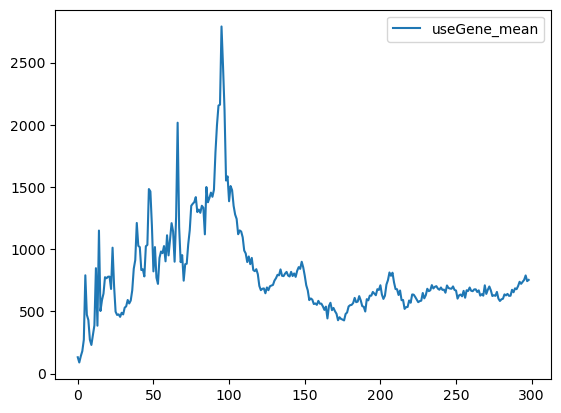

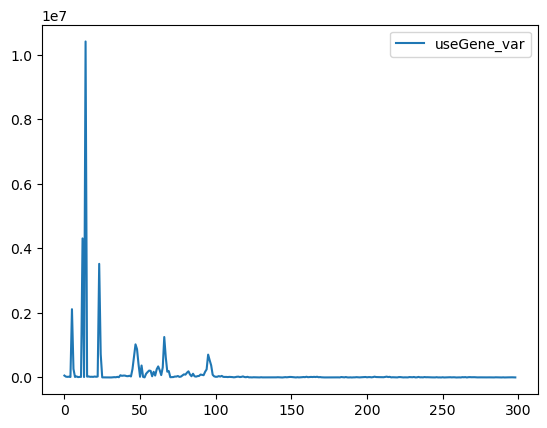

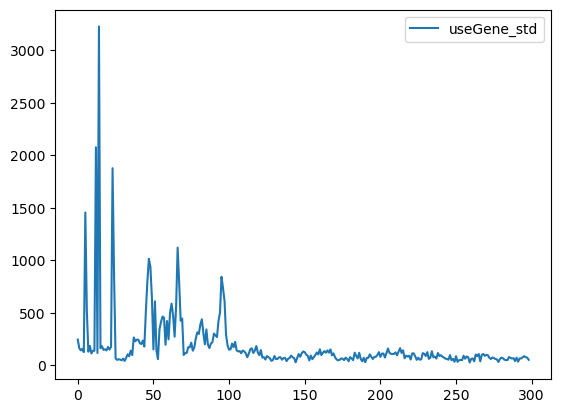

In [69]:
import matplotlib.pyplot as plt
import io
from PIL import Image
  
e_path=os.path.join(_path ,"plot")
for name in col_df_2 : 
    df_score = read_df_rd ( _path, name+".csv",0)
    for _col in df_score.columns:
        df_score[[_col]].plot()
        fig = plt.gcf()
        img = fig2img(fig)
        l_path = os.path.join(e_path,name) 
        if not os.path.exists(l_path):
            os.makedirs(l_path)
        img.save(  os.path.join(l_path,_col+'.png'))


In [ ]:
def t4fd_2 (x ):
    if(True):
        print(x)
        print(type(x))
        return np.mean(np.array(x))
    else :
        return 0
    
    

def t4fd (x ):
    if(True):
        print(x)
        print(type(x))
        return np.var(np.array(x))
    else :
        return 0
variances = nouveau_df .apply(lambda x: pute (x))


In [ ]:
ecarts_types = nouveau_df .apply(lambda x: np.std(x))